## Lab 8: $k$-medoids and $c$-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1
Use the ```s3.txt``` dataset from the previous lab.
1. Run **your** $k$-means code 20 times with $k=15$. Save the minimum, the maximum and the average values of the loss.

In [2]:
s3 = np.genfromtxt("../Datasets/s3.txt")
print(s3.shape)
print(s3)

(5000, 2)
[[453320. 606542.]
 [520651. 594591.]
 [516664. 660290.]
 ...
 [351482. 334662.]
 [341057. 341338.]
 [374464. 284441.]]


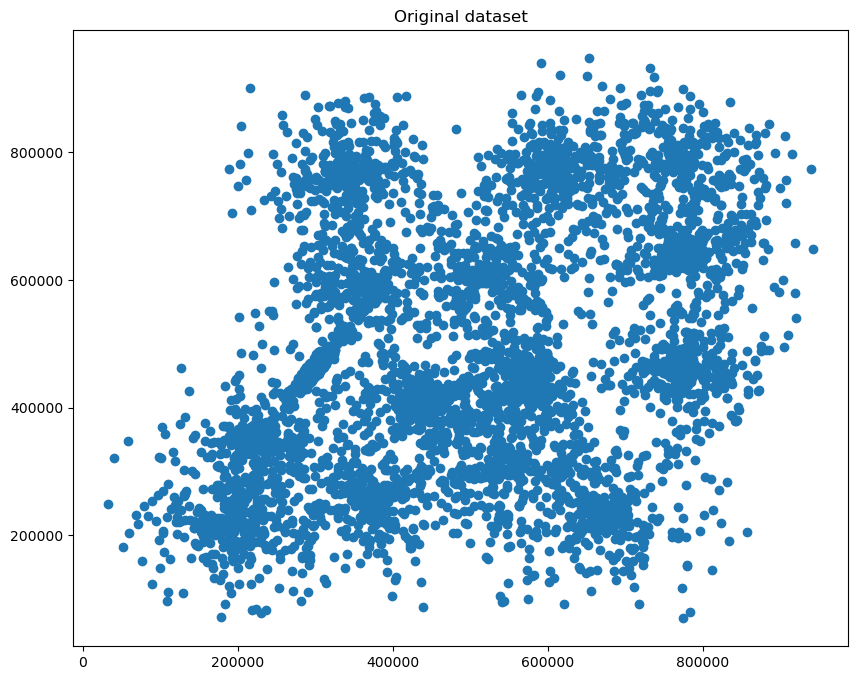

In [3]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1])
plt.title("Original dataset")
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans = KMeans(n_clusters=15, init='random', n_init=1)
    kmeans.fit(s3)
    results[i] = kmeans.inertia_

In [6]:
results

array([2.09717917e+13, 2.09420382e+13, 1.87114805e+13, 2.13910233e+13,
       1.68907277e+13, 2.11060126e+13, 1.86224531e+13, 2.09840498e+13,
       1.89526477e+13, 1.68931012e+13, 1.92313032e+13, 2.10121972e+13,
       2.07288217e+13, 1.89590207e+13, 1.68902566e+13, 1.87121200e+13,
       1.68903053e+13, 1.89322380e+13, 1.88343073e+13, 2.11431340e+13])

In [7]:
kmeans_avg = np.mean(results)
kmeans_min = np.min(results)
kmeans_max = np.max(results)

In [8]:
print(f"The average value of the loss is: {kmeans_avg} \nThe minimum is {kmeans_min} while the maximum is {kmeans_max}")

The average value of the loss is: 19339951485877.812 
The minimum is 16890256567681.94 while the maximum is 21391023259902.258


2. Modify your code such that it uses the $k$-means++ initialization. Perform the same experiment of point 1 and compare the obtained values.

In [9]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans_pp = KMeans(n_clusters=15, init='k-means++', n_init=1)
    kmeans_pp.fit(s3)
    results[i] = kmeans_pp.inertia_

In [10]:
results

array([1.87865260e+13, 1.68900943e+13, 1.89218783e+13, 1.88442539e+13,
       1.68901288e+13, 1.68904320e+13, 1.89638942e+13, 1.86870494e+13,
       1.88591789e+13, 1.68907720e+13, 1.68925319e+13, 1.68909073e+13,
       1.68920653e+13, 1.91215498e+13, 1.68904400e+13, 1.88478966e+13,
       1.86669361e+13, 1.68906409e+13, 1.88563582e+13, 1.89815268e+13])

In [11]:
kmeans_pp_avg = np.mean(results)
kmeans_pp_min = np.min(results)
kmeans_pp_max = np.max(results)

In [12]:
print(f"The average value of the loss is: {kmeans_pp_avg} \nThe minimum is {kmeans_pp_min} while the maximum is {kmeans_pp_max}")

The average value of the loss is: 17977753035595.375 
The minimum is 16890094282957.055 while the maximum is 19121549805696.348


In [13]:
print(kmeans_avg > kmeans_pp_avg)
print(kmeans_min > kmeans_pp_min)
print(kmeans_max > kmeans_pp_max)

True
True
True


3. Build a scree plot by plotting the best (ie. the lowest) loss out of 20 runs for $k=2, \dots, 20$ (with $k$-means++). What is the optimal value of $k$?

In [14]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=1)
        kmeans_pp.fit(s3)
        results[i] = kmeans_pp.inertia_

        #to avoid the loop
        #kmeans = KMeans(n_clusters=k, initi='random', n_init=20).fit(s3)
        #then loss.append(kmeans.inertia_)
    
    loss.append(np.min(results))

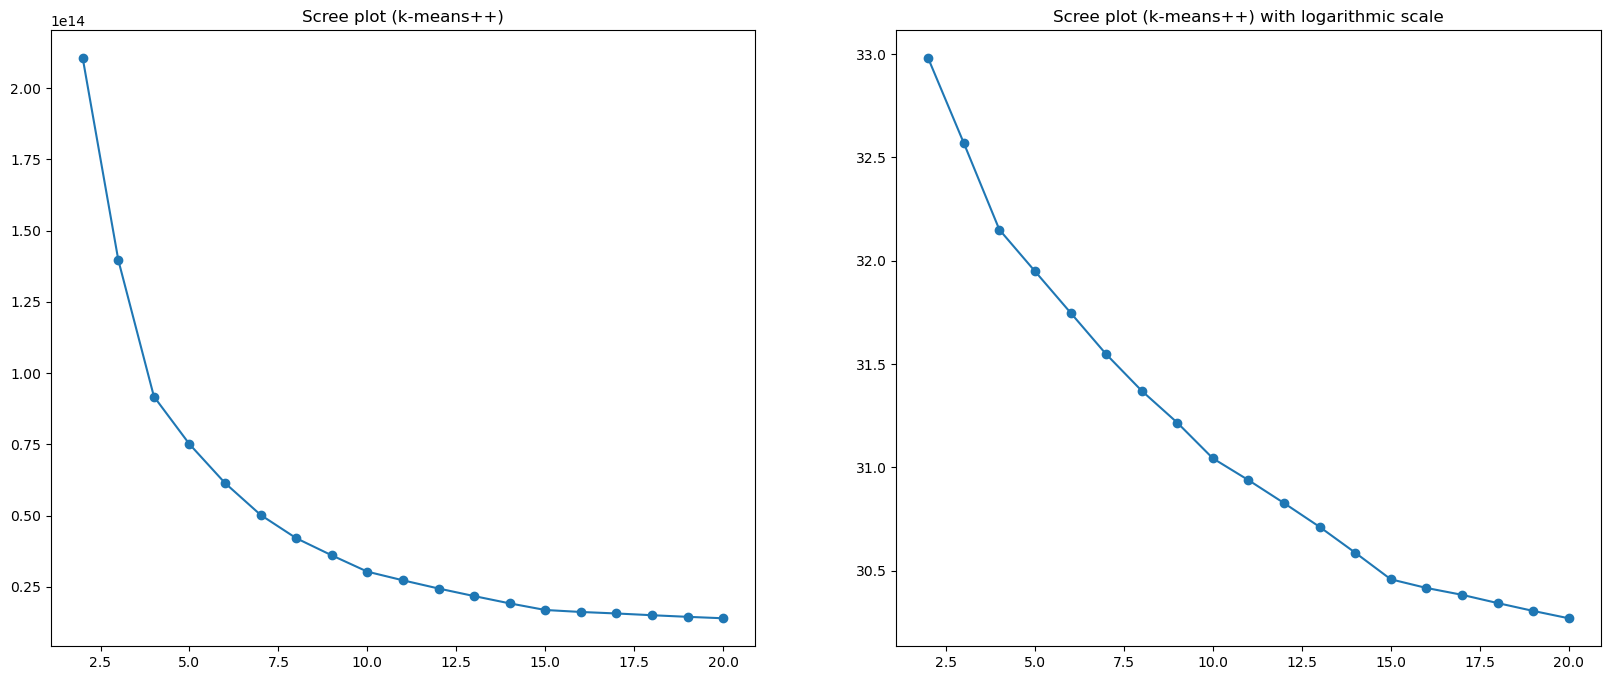

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,8))


ax[0].plot(range(2,21), loss)
ax[0].scatter(range(2,21),loss)
ax[0].set_title("Scree plot (k-means++)")

ax[1].plot(range(2,21), np.log(loss))
ax[1].scatter(range(2,21),np.log(loss))
ax[1].set_title("Scree plot (k-means++) with logarithmic scale")

plt.show()

4. Modify your code to perform $k$-medoids. Repeat the assignment of point 3 with the new implementation.

Note: [k-medoids documentation](https://python-kmedoids.readthedocs.io/en/latest/#)

In [16]:
from kmedoids import KMedoids #it has a sklearn-compatible API

In [17]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmedoids= KMedoids(n_clusters=k, init="random", metric="euclidean")
        kmedoids.fit(s3)
        results[i] = kmedoids.inertia_
    
    loss.append(np.min(results))

From the documentation of KMedoids, note that the  ```inertia_ ``` is computed as the sum of distances of samples to their closest cluster center.

For the ```sklearn.cluster.KMeans``` instead, ```inertia_``` is computed as the sum of **squared** distances of samples to their closest cluster center, weighted by the sample weights if provided.

The difference in the magnitude of the loss in the following plot is related to this difference in the implementations. For **your** implementation, use the loss function with the squared distances.

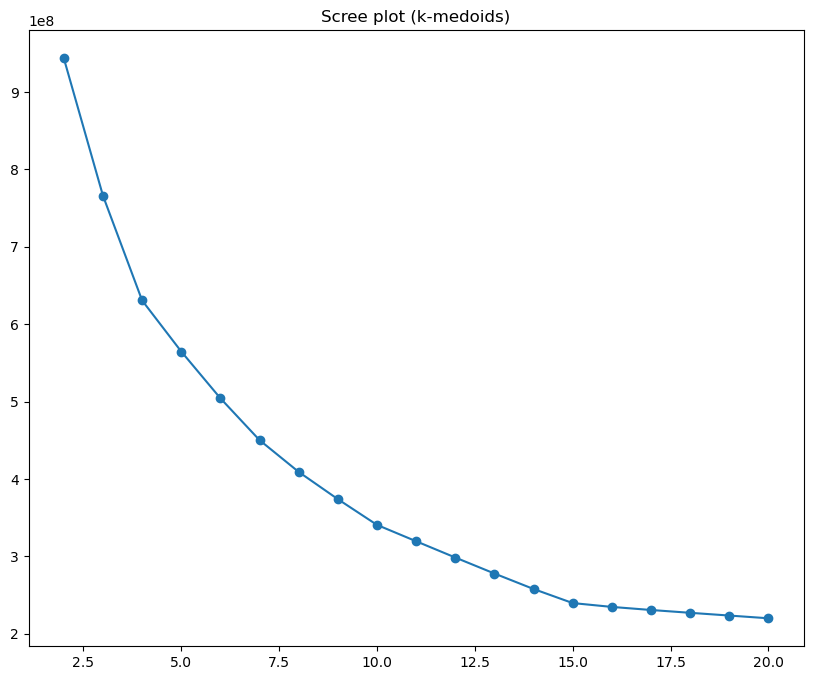

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (k-medoids)")
plt.show()

5. Modify your code to perform $c$-means. Repeat the assignment of point 3 with the new implementation.

Note: [c-means documentation](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.cluster.html#cmeans)

In [19]:
from skfuzzy.cluster import cmeans

# 'cntr': cluster centers 
# 'u' : final fuzzy c-partitioned matrix
# 'u0': initial guess at fuzzy c-partitioned matrix (either 'init' or random guess)
# 'd': final Euclidean distance matrix
# 'jm': objective function history
# 'p': number of iterations run
# 'fpc': final fuzzy partition coefficient

In [20]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        cntr, u, u0, d, jm, p, fpc = cmeans(data= s3.T, c=k, m=2, error = 0.005, maxiter=1000, init=None)
        #NB 'data' must have shape num_features x num_points
        results[i] = jm[p-1]    # 'jm' is the history of the objective function, 'p' is the number of performed iterations
    loss.append(np.min(results))

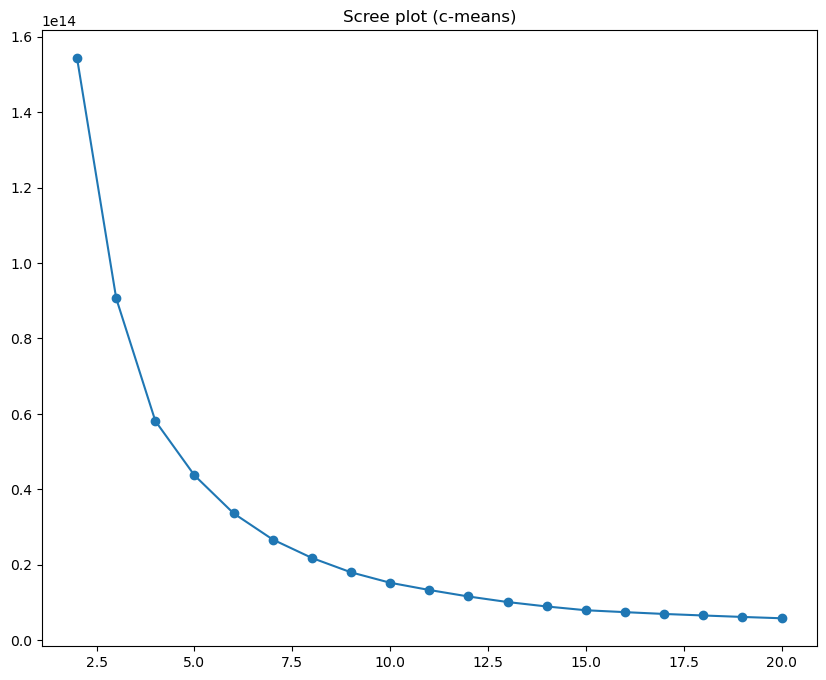

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (c-means)")
plt.show()